In [21]:
import pandas as pd
df = pd.read_csv('telemedicine_use.csv')
df.head(5)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN


In [22]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Convert date columns to datetime format
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])

# Split 'Confidence Interval' into 'CI_Low' and 'CI_High'
df[['CI_Low', 'CI_High']] = df['Confidence Interval'].str.split(' - ', expand=True)

# Convert 'CI_Low' and 'CI_High' to numeric
df['CI_Low'] = pd.to_numeric(df['CI_Low'], errors='coerce')
df['CI_High'] = pd.to_numeric(df['CI_High'], errors='coerce')

# Normalize the relevant columns
scaler = MinMaxScaler()
df[['Value', 'Low CI', 'High CI', 'CI_Low', 'CI_High']] = scaler.fit_transform(
    df[['Value', 'Low CI', 'High CI', 'CI_Low', 'CI_High']]
)

# Display the processed data
print(df.head())

                                           Indicator              Group  \
0  Adults Who Had Appointment with Health Profess...  National Estimate   
1  Adults Who Had Appointment with Health Profess...             By Age   
2  Adults Who Had Appointment with Health Profess...             By Age   
3  Adults Who Had Appointment with Health Profess...             By Age   
4  Adults Who Had Appointment with Health Profess...             By Age   

           State       Subgroup  Phase  Time Period Time Period Label  \
0  United States  United States    3.1           28   Apr 14 - Apr 26   
1  United States  18 - 29 years    3.1           28   Apr 14 - Apr 26   
2  United States  30 - 39 years    3.1           28   Apr 14 - Apr 26   
3  United States  40 - 49 years    3.1           28   Apr 14 - Apr 26   
4  United States  50 - 59 years    3.1           28   Apr 14 - Apr 26   

  Time Period Start Date Time Period End Date     Value    Low CI   High CI  \
0             2021-04-14       

In [24]:
# Descriptive statistics
print(df.describe())

             Phase  Time Period        Value       Low CI      High CI  \
count  1066.000000  1066.000000  1009.000000  1009.000000  1009.000000   
mean      2.944465    29.761726     0.445137     0.395041     0.423084   
std       0.819545     6.283855     0.153602     0.157619     0.148413   
min      -1.000000     1.000000     0.000000     0.000000     0.000000   
25%       3.100000    29.000000     0.346041     0.288184     0.322997   
50%       3.100000    31.000000     0.451613     0.403458     0.410853   
75%       3.100000    33.000000     0.542522     0.504323     0.514212   
max       3.200000    34.000000     1.000000     1.000000     1.000000   

       Suppression Flag       CI_Low      CI_High  
count              13.0  1009.000000  1009.000000  
mean                1.0     0.395041     0.423084  
std                 0.0     0.157619     0.148413  
min                 1.0     0.000000     0.000000  
25%                 1.0     0.288184     0.322997  
50%                 1

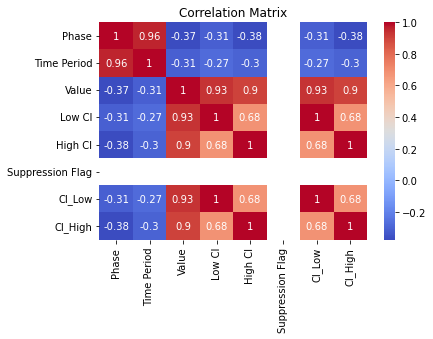

In [25]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


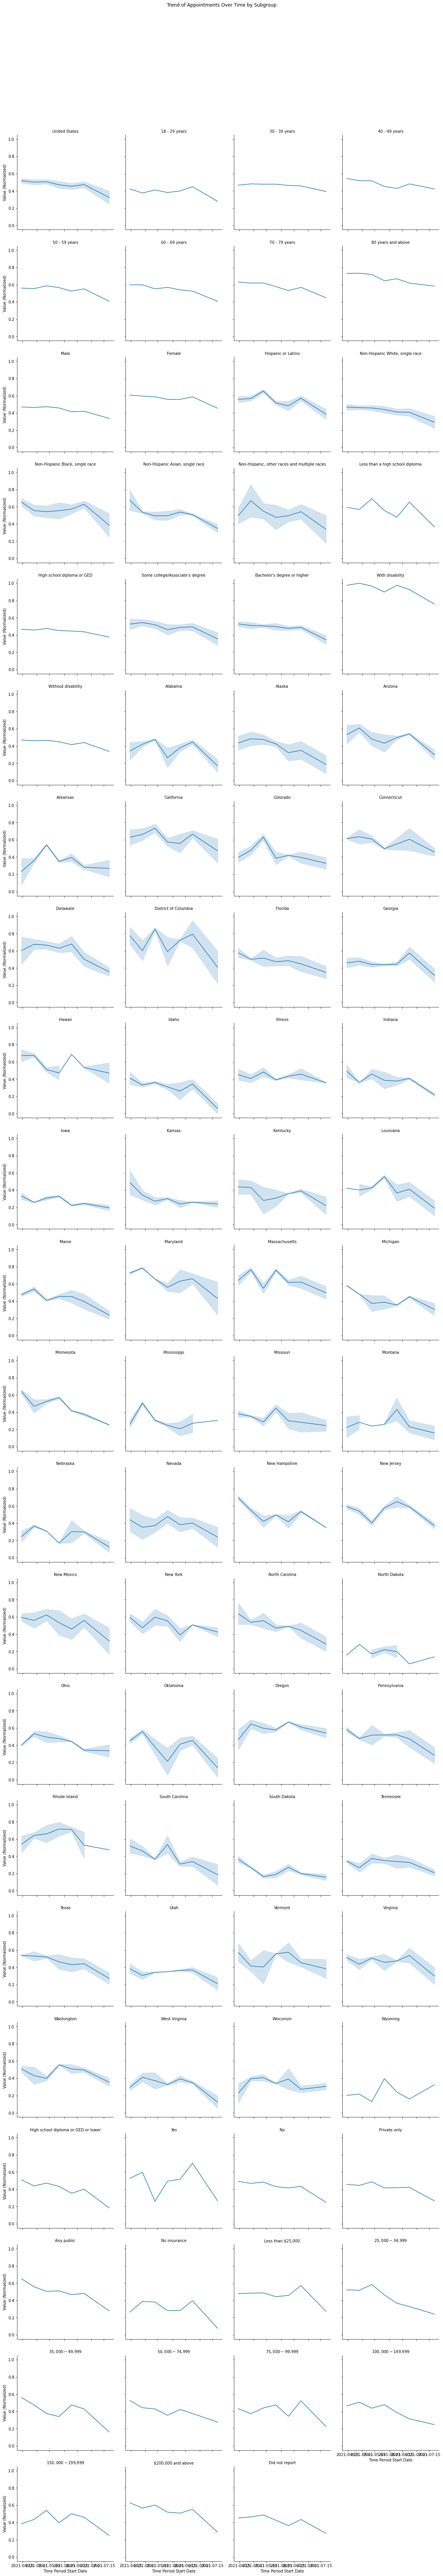

In [26]:
g = sns.FacetGrid(df, col="Subgroup", col_wrap=4, height=4)
g.map(sns.lineplot, 'Time Period Start Date', 'Value')
g.set_titles("{col_name}")
g.fig.suptitle('Trend of Appointments Over Time by Subgroup', y=1.05)
g.set_axis_labels('Time Period Start Date', 'Value (Normalized)')
plt.show()


/var/folders/h5/wvhp84hj68g_sf3vy7k066cr0000gp/T/ipykernel_1204/3453174138.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


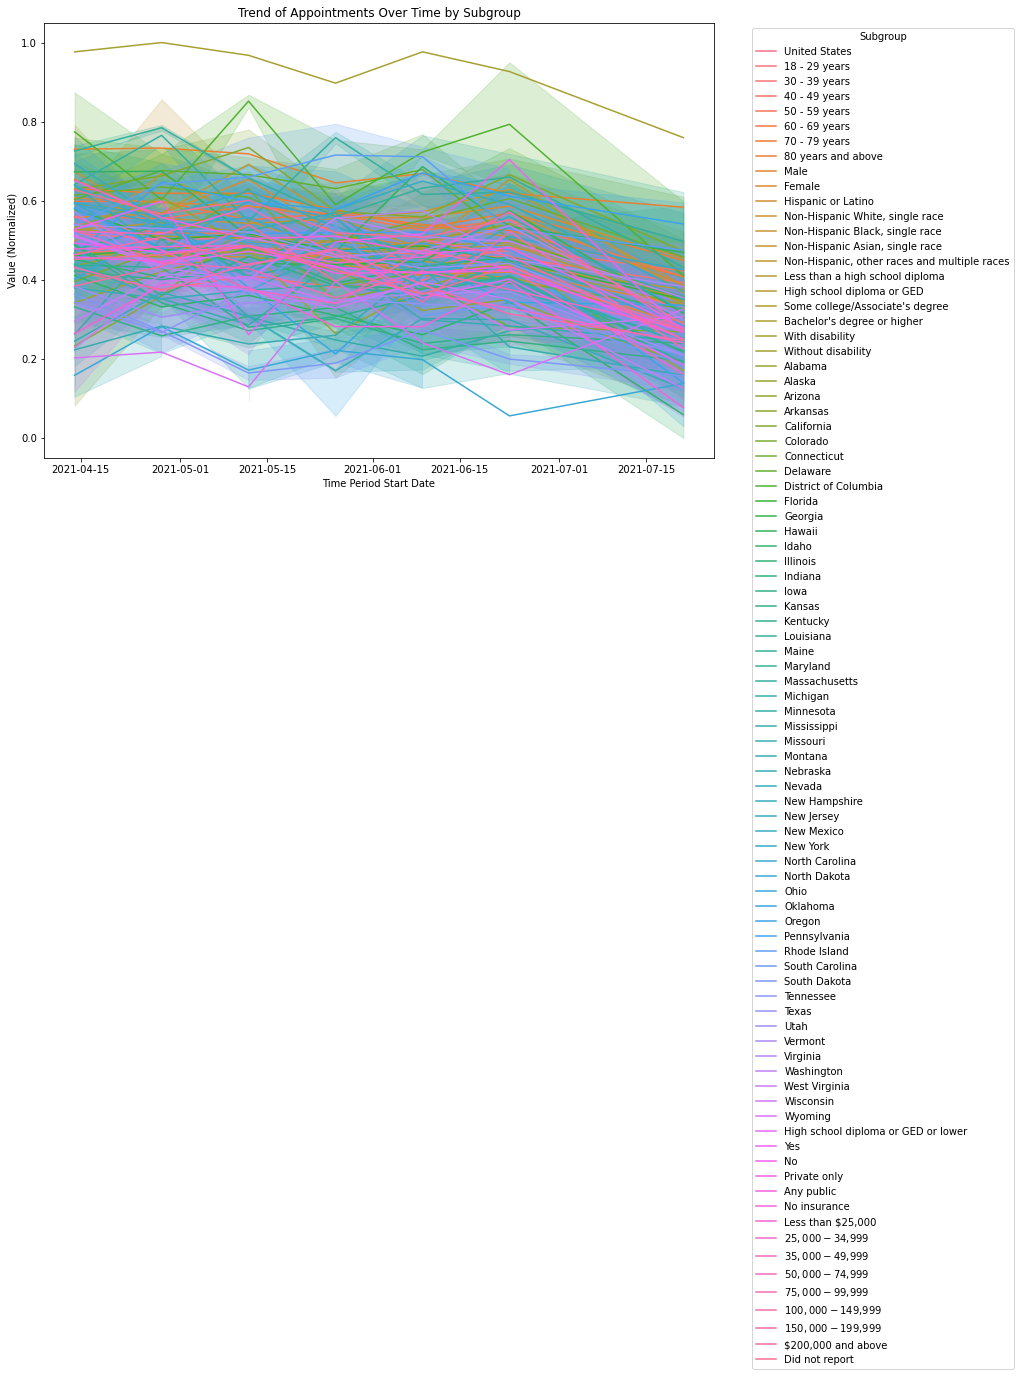

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot all subgroups in one figure
sns.lineplot(x='Time Period Start Date', y='Value', hue='Subgroup', data=df)

# Adding title and labels
plt.title('Trend of Appointments Over Time by Subgroup')
plt.xlabel('Time Period Start Date')
plt.ylabel('Value (Normalized)')

# Show legend
plt.legend(title='Subgroup', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [31]:
# Example function to convert '17.7 - 19.8' to the mean of the range
def convert_confidence_interval(ci_str):
    if isinstance(ci_str, str):
        parts = ci_str.split(' - ')
        if len(parts) == 2:
            try:
                low = float(parts[0])
                high = float(parts[1])
                return (low + high) / 2
            except ValueError:
                return np.nan  # Handle conversion errors
    return np.nan

# Apply the function to the 'Confidence Interval' column
df['Confidence Interval'] = df['Confidence Interval'].apply(convert_confidence_interval)

# Check if there are any NaN values after conversion
print(df['Confidence Interval'].isna().sum())

# Fill or drop NaN values as needed
df = df.dropna(subset=['Confidence Interval'])

# Proceed with feature selection and model training as before
X = df[['Time Period Length', 'Low CI', 'High CI', 'Confidence Interval']]
y = df['Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

57
Mean Absolute Error: 0.002832331620258761
Root Mean Squared Error: 0.004924045244169386
R-squared: 0.999129024670669


In [28]:
# Example of rule-based logic using a simple if-else condition
def expert_system_prediction(row):
    if row['Subgroup'] == '50 - 59 years' and row['Value'] > 0.6:
        return row['Value'] + 0.05  # Hypothetical adjustment based on expert knowledge
    else:
        return row['Value']

df['Expert Prediction'] = df.apply(expert_system_prediction, axis=1)

# Combine with machine learning predictions
df['Final Prediction'] = (df['Expert Prediction'] + df['Value']) / 2

# Display the adjusted predictions
print(df[['Subgroup', 'Value', 'Expert Prediction', 'Final Prediction']].head())


        Subgroup     Value  Expert Prediction  Final Prediction
0  United States  0.542522           0.542522          0.542522
1  18 - 29 years  0.422287           0.422287          0.422287
2  30 - 39 years  0.466276           0.466276          0.466276
3  40 - 49 years  0.542522           0.542522          0.542522
4  50 - 59 years  0.560117           0.560117          0.560117


In [33]:
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree as a basic sequential decision-making model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_dt_pred = decision_tree_model.predict(X_test)

print("Decision Tree Mean Absolute Error:", mean_absolute_error(y_test, y_dt_pred))


Decision Tree Mean Absolute Error: 0.004718213756859556


In [34]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_best_pred = best_model.predict(X_test)
print("Optimized Model MAE:", mean_absolute_error(y_test, y_best_pred))
print("Optimized Model RMSE:", np.sqrt(mean_squared_error(y_test, y_best_pred)))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Model MAE: 0.002878901774112886
Optimized Model RMSE: 0.004809074970688646


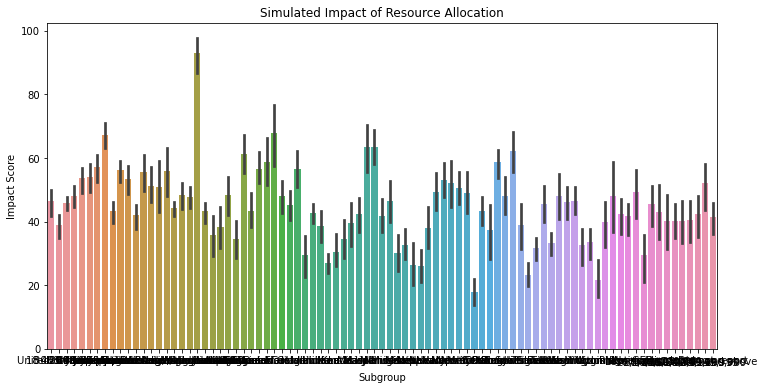

In [29]:
# Simulate impact using Final Prediction column (this would be more complex in a real scenario)
df['Impact Score'] = df['Final Prediction'] * 100  # Hypothetical impact score

# Visualize the impact scores across subgroups
plt.figure(figsize=(12, 6))
sns.barplot(x='Subgroup', y='Impact Score', data=df)
plt.title('Simulated Impact of Resource Allocation')
plt.ylabel('Impact Score')
plt.show()

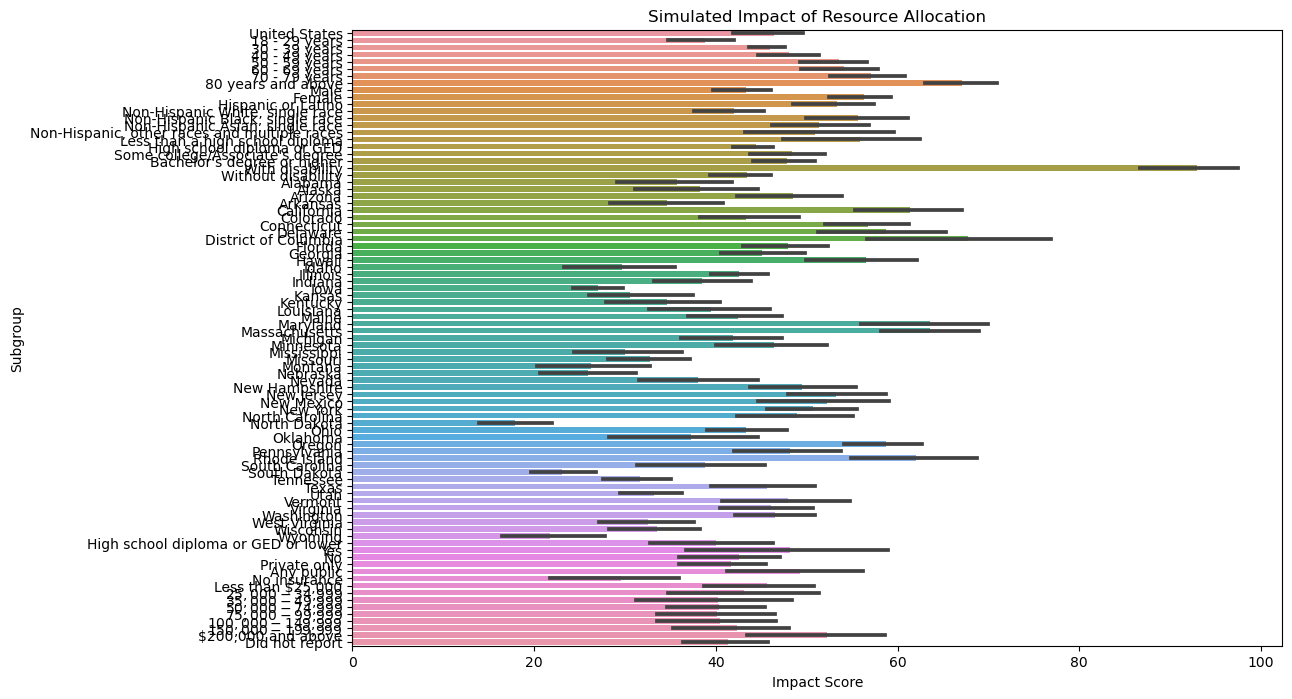

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Subgroup', x='Impact Score', data=df, orient='h')

plt.title('Simulated Impact of Resource Allocation')
plt.xlabel('Impact Score')
plt.show()


/Users/aliabbas/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


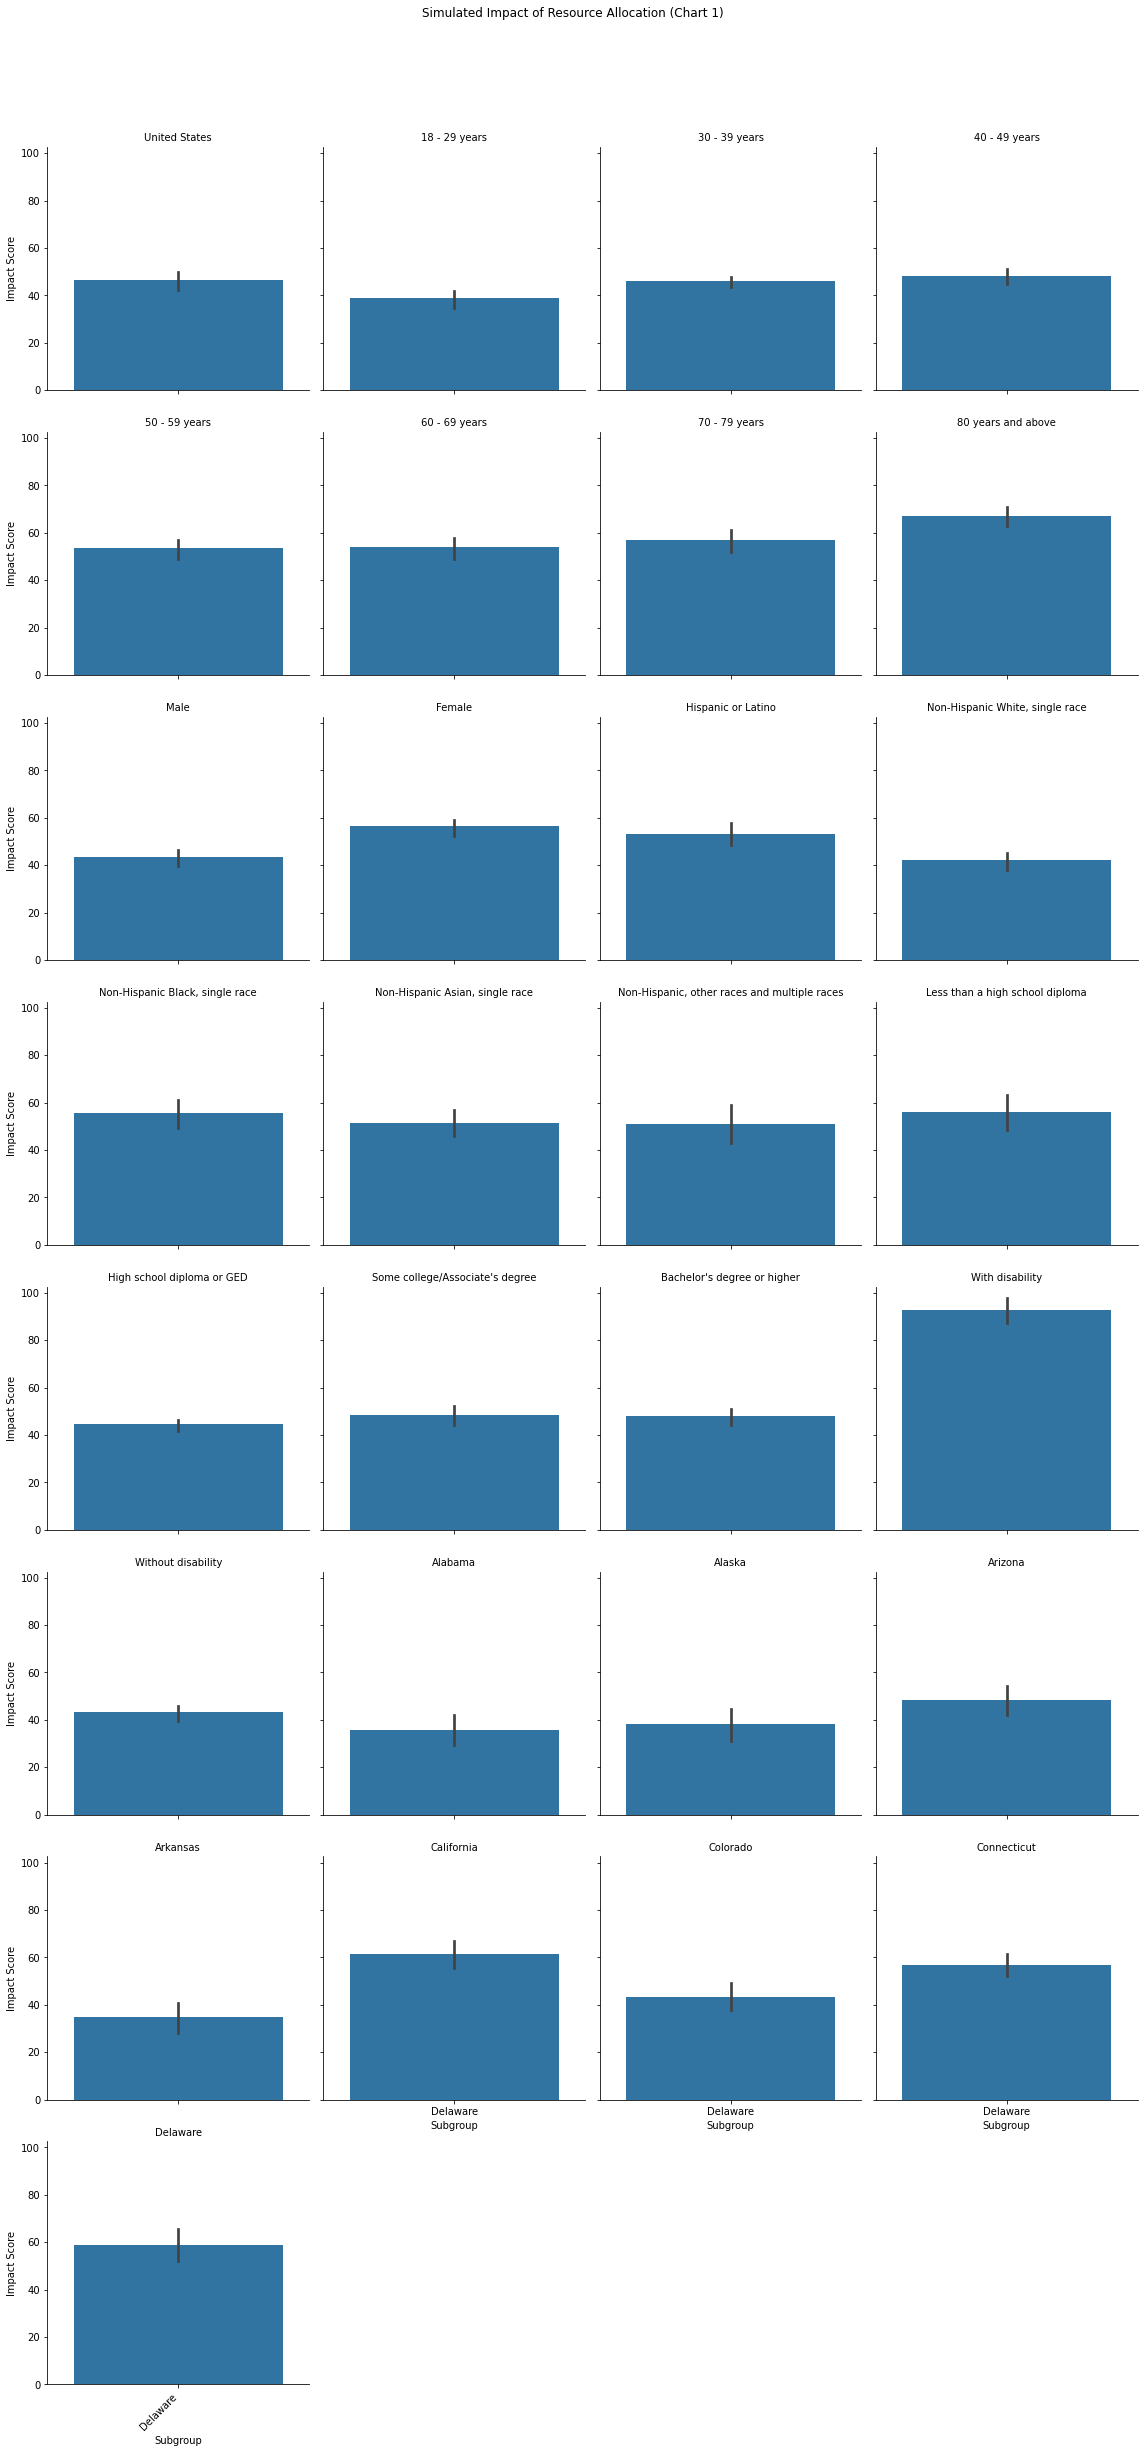

/Users/aliabbas/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


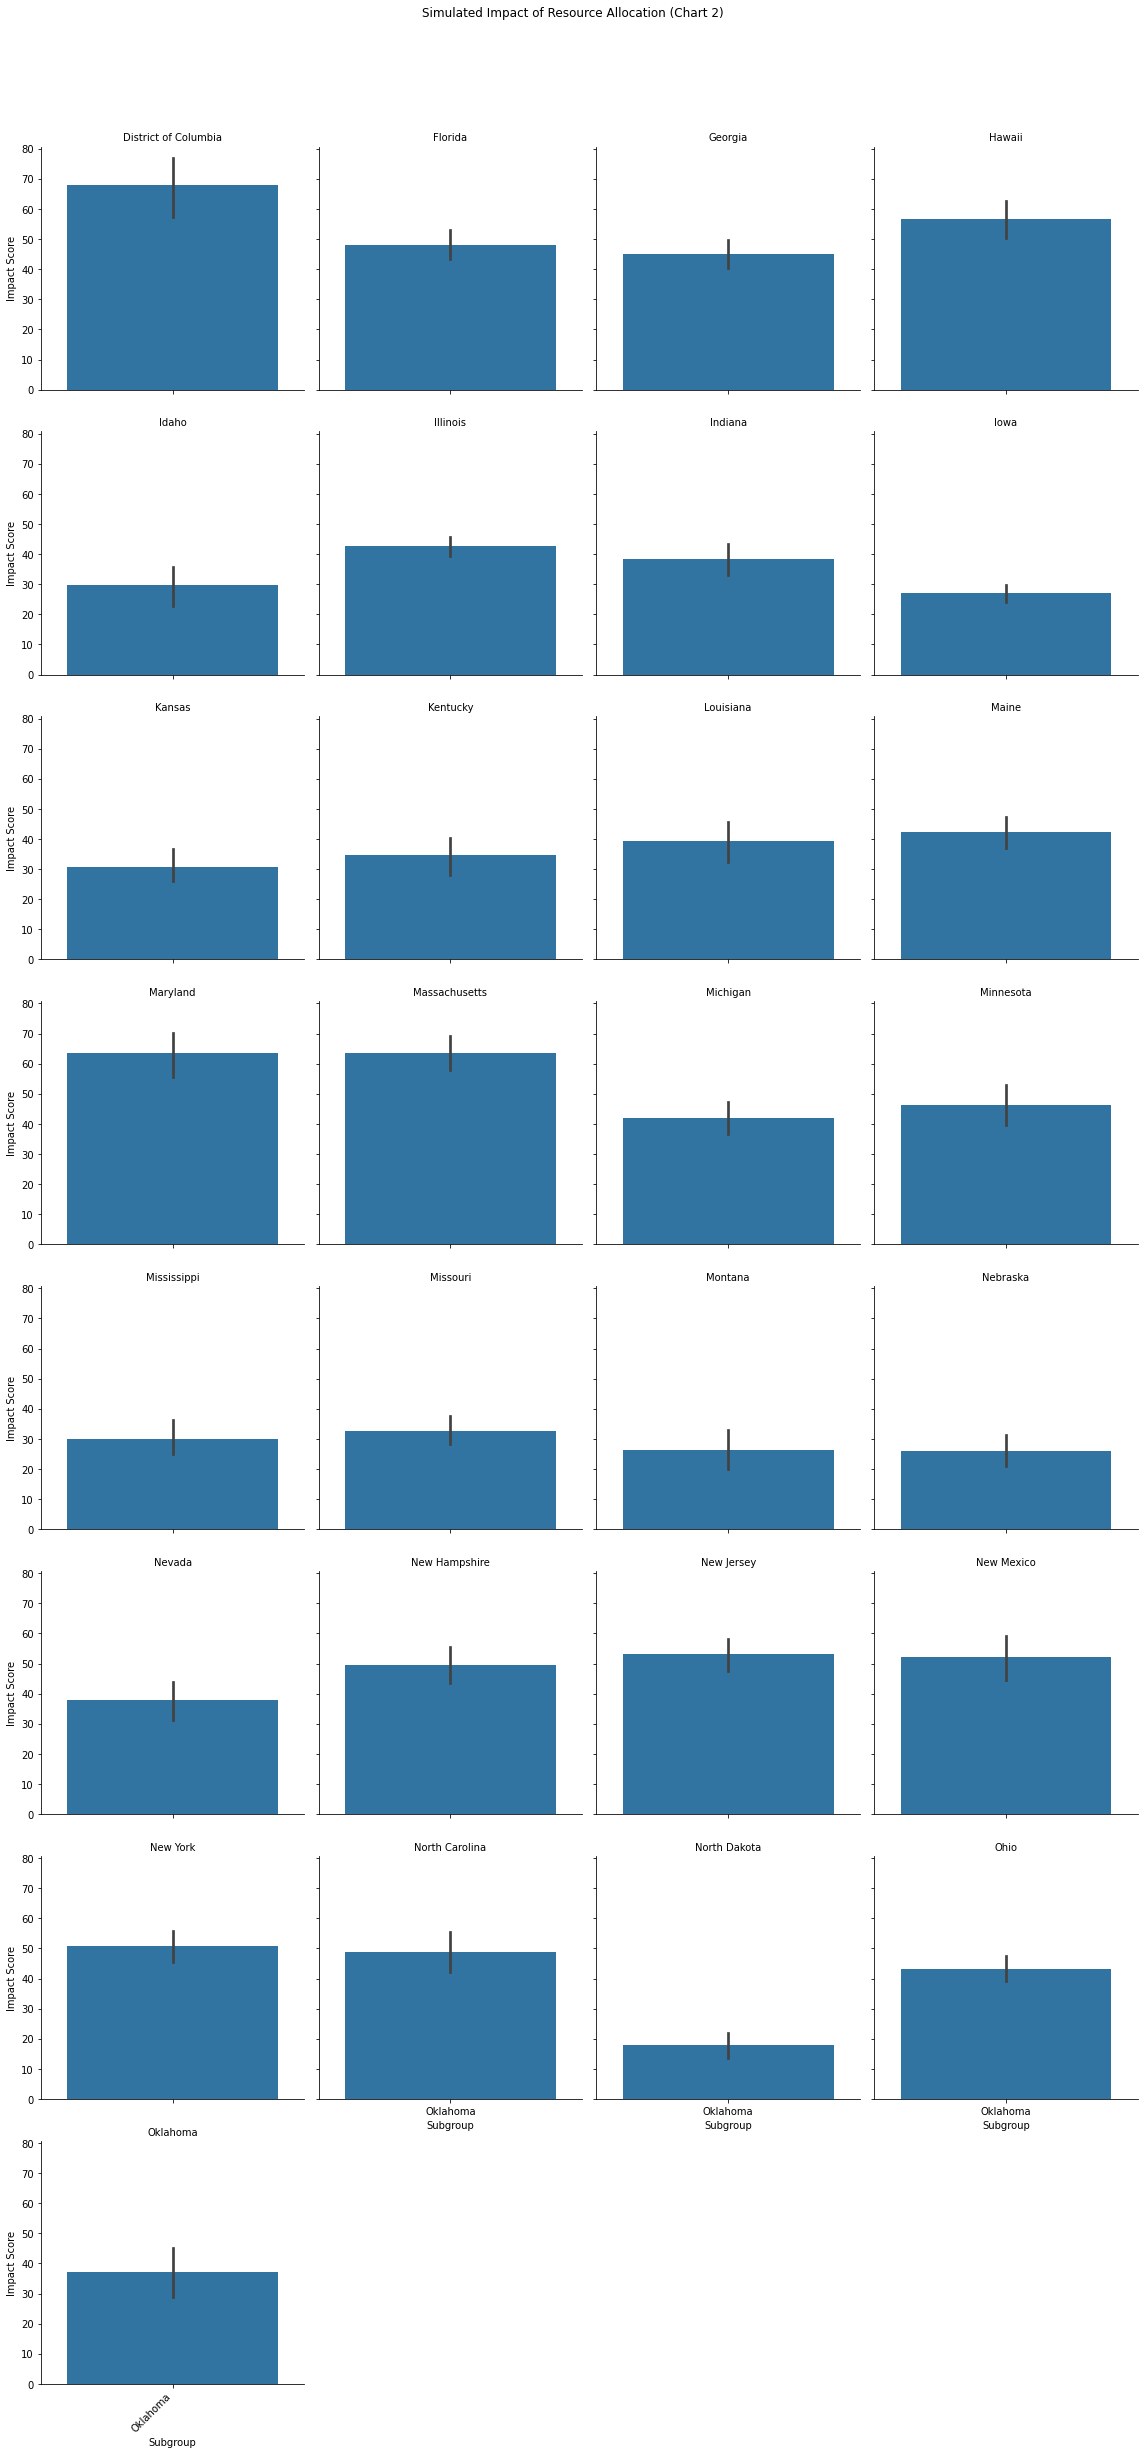

/Users/aliabbas/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


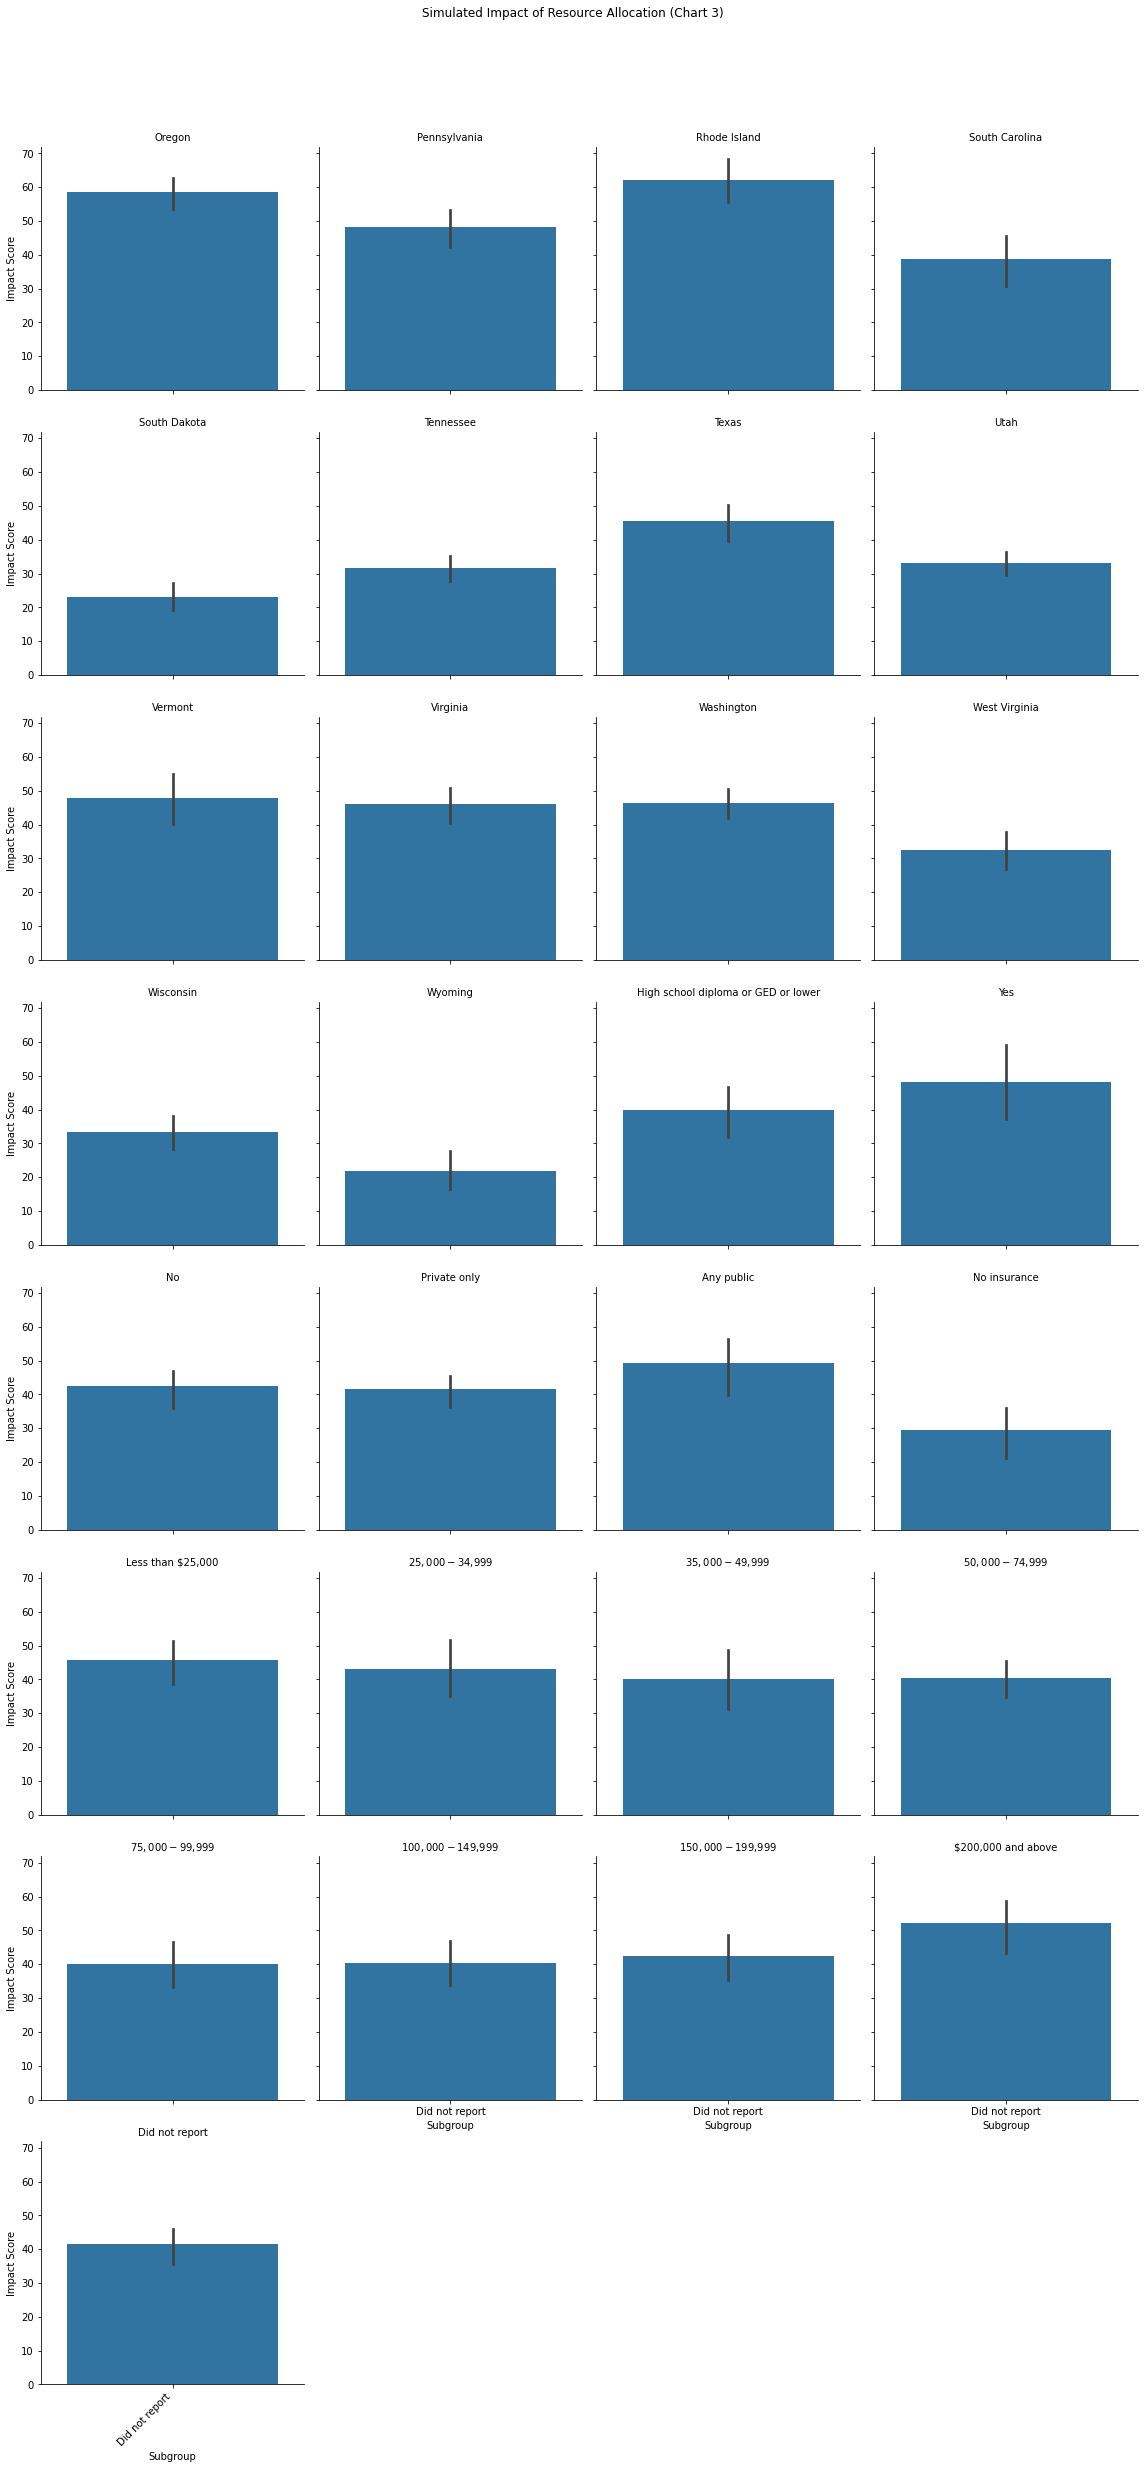

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of charts (subplots)
num_charts = 3

# Determine the number of subgroups per chart
subgroups = df['Subgroup'].unique()
num_subgroups = len(subgroups)
subgroups_per_chart = num_subgroups // num_charts

# Create subplots
for i in range(num_charts):
    start_idx = i * subgroups_per_chart
    end_idx = (i + 1) * subgroups_per_chart
    subset = subgroups[start_idx:end_idx]
    
    subset_df = df[df['Subgroup'].isin(subset)]

    g = sns.FacetGrid(subset_df, col="Subgroup", col_wrap=4, height=4)
    g.map(sns.barplot, 'Subgroup', 'Impact Score')
    g.set_titles("{col_name}")
    g.fig.suptitle(f'Simulated Impact of Resource Allocation (Chart {i + 1})', y=1.05)
    g.set_axis_labels('Subgroup', 'Impact Score')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [44]:
from IPython.display import FileLink

# Create a download link for the file
FileLink('impact_scores_all_charts.png')


C:\Users\Aizaz Torwali\impact_scores_all_charts.png

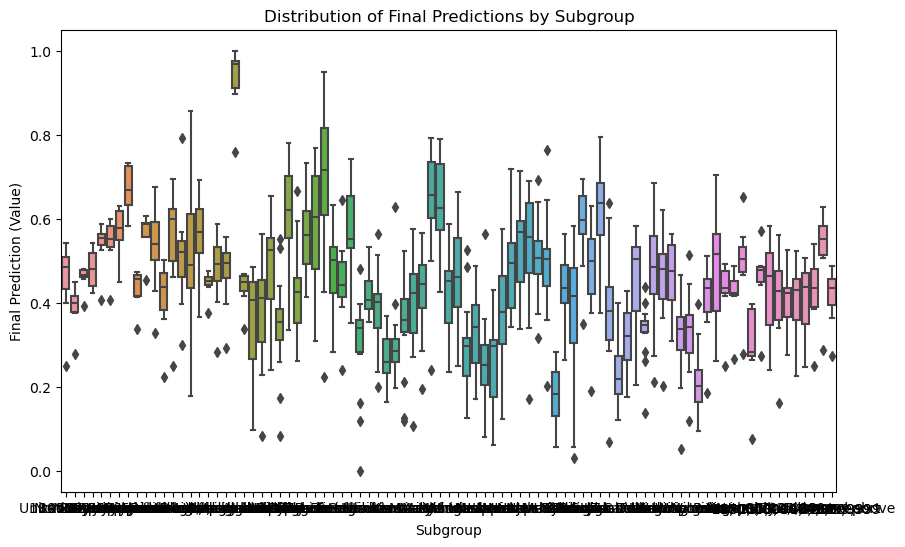

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization examples
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subgroup', y='Final Prediction', data=df)
plt.title('Distribution of Final Predictions by Subgroup')
plt.ylabel('Final Prediction (Value)')
plt.show()

# You can also export results to CSV for reporting
df.to_csv('final_results.csv', index=False)


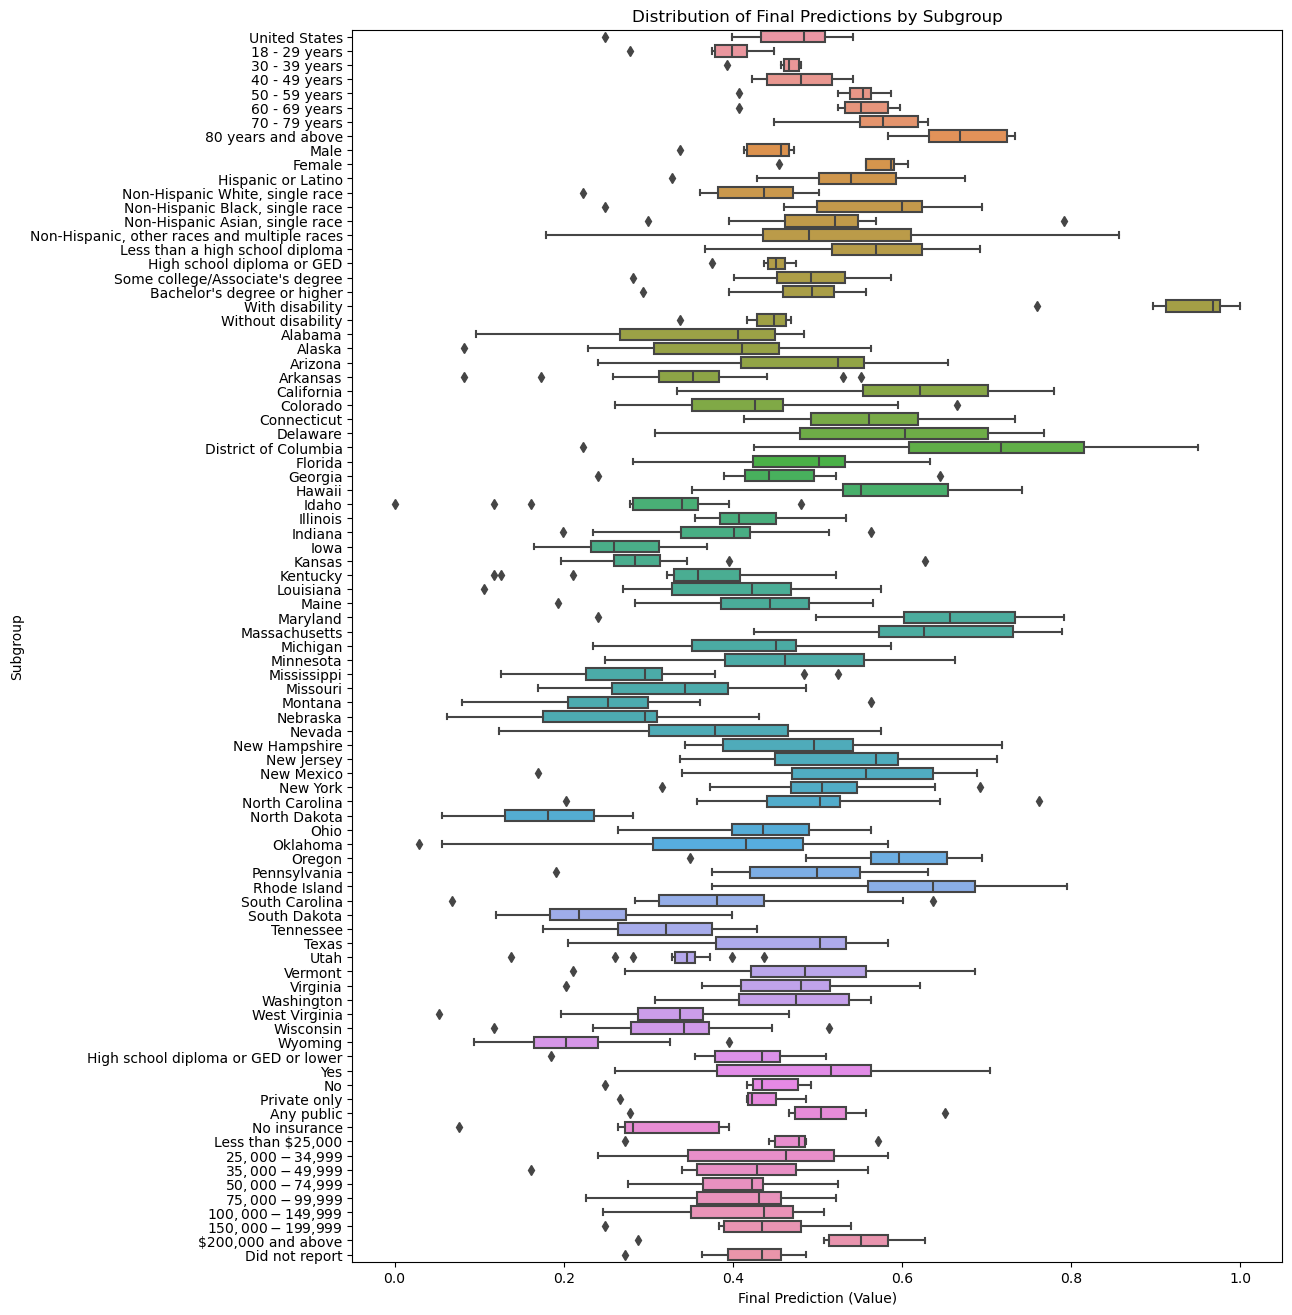

C:\Users\Aizaz Torwali\final_prediction_boxplot.jpg

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import FileLink

# Increase the figure size and create a horizontal boxplot
plt.figure(figsize=(12, 16))  # Increase height for better readability
sns.boxplot(y='Subgroup', x='Final Prediction', data=df)
plt.title('Distribution of Final Predictions by Subgroup')
plt.xlabel('Final Prediction (Value)')
plt.ylabel('Subgroup')

# Save the figure as a JPG file in the current directory
file_path = 'final_prediction_boxplot.jpg'
plt.savefig(file_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Create a download link
FileLink(file_path)
